In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as LinReg  
from sklearn.linear_model import Lasso       
from sklearn.linear_model import Ridge      
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR  
from sklearn.tree import ExtraTreeRegressor as ETR


In [2]:
#%pip install lazypredict

In [3]:
"""%pip install xgboost

%pip install catboost

%pip install lightgbm"""

'%pip install xgboost\n\n%pip install catboost\n\n%pip install lightgbm'

In [4]:
from catboost import CatBoostRegressor as CTR
from lightgbm import LGBMRegressor as LGBMR
from sklearn.ensemble import GradientBoostingRegressor as GBR
from xgboost import XGBRegressor as XGBR
from lazypredict.Supervised import LazyRegressor 

In [5]:
mad_total = pd.read_csv('../analisis_exploratorio/mad_total_limp.csv')

In [6]:
mad_centro = pd.read_csv('../analisis_exploratorio/mad_int_limp.csv')

In [7]:
mad_exterior = pd.read_csv('../analisis_exploratorio/mad_ext_limp.csv')

In [8]:
alquiler = pd.read_csv('../analisis_exploratorio/alquiler_limp.csv')

In [9]:
mad_total

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,0,central,villaverde,26100,59,2,3,3,0,442.37,2109.77,1022.74,españa,madrid
1,0,central,villaverde,50600,53,3,2,3,3,954.72,2109.77,1022.74,españa,madrid
2,0,central,villaverde,51700,60,3,3,1,0,861.67,2109.77,1022.74,españa,madrid
3,0,central,villaverde,51700,60,3,3,3,0,861.67,2109.77,1022.74,españa,madrid
4,0,central,villaverde,51700,59,3,4,1,0,876.27,2109.77,1022.74,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35779,1,exterior,sureste,1400000,805,12,-4,2,2,1739.13,1291.27,1140.37,españa,madrid
35780,1,exterior,sureste,1400000,950,10,-4,2,2,1473.68,1291.27,1140.37,españa,madrid
35781,1,exterior,sureste,1500000,500,5,-4,2,2,3000.00,1291.27,1140.37,españa,madrid
35782,1,exterior,sureste,2000000,3000,1,-4,2,2,666.67,1291.27,1140.37,españa,madrid


In [10]:
modelo_num = mad_total.drop(columns=['distrito_€/m2','€/m2','zona','distrito'])

In [11]:
modelo = mad_total.drop(columns=['distrito_€/m2','€/m2'])

In [12]:
"""plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(modelo_num.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});"""

"plt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(modelo_num.corr(method='spearman'), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(modelo_num.corr(method='spearman'),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [13]:
X = modelo.drop('precio', axis=1)

y = modelo.precio

In [14]:
X = X.drop(columns=['media_alq','caract'])

In [15]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((28627, 9), (7157, 9), (28627,), (7157,))

In [16]:
"""from lazypredict.Supervised import LazyRegressor

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)

models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)"""

'from lazypredict.Supervised import LazyRegressor\n\nreg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)\n\nmodels, predictions = reg.fit(X_train, X_test, y_train, y_test)\n\nprint(models)'

In [17]:
X = pd.get_dummies(X, columns=['zona'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['zona'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['zona'], dtype=int, drop_first=True)

In [18]:
X = pd.get_dummies(X, columns=['distrito'], dtype=int, drop_first=True)

X_train = pd.get_dummies(X_train, columns=['distrito'], dtype=int, drop_first=True)

X_test = pd.get_dummies(X_test, columns=['distrito'], dtype=int, drop_first=True)

In [19]:
X_train

,descripcion,superficie,habitaciones,plantas,ascensor,pais,ciudad,zona_exterior,distrito_barajas,distrito_barrio de salamanca,distrito_carabanchel,distrito_centro,distrito_chamartin,distrito_chamberi,distrito_ciudad lineal,distrito_corredor de henares,distrito_fuencarral,distrito_hortaleza,distrito_latina,distrito_moncloa,distrito_moratalaz,distrito_noroeste,distrito_norte,distrito_puente de vallecas,distrito_retiro,distrito_san blas,distrito_sur,distrito_sureste,distrito_suroeste,distrito_tetuan,distrito_usera,distrito_vicalvaro,distrito_villa de vallecas,distrito_villaverde
24788,1,220,3,-4,2,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8023,0,51,2,-2,0,españa,madrid,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31702,0,112,3,3,1,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
35765,1,1000,7,-4,2,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
31782,0,107,4,2,1,españa,madrid,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16850,0,139,5,8,1,españa,madrid,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6265,0,100,3,7,1,españa,madrid,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11284,0,110,4,2,1,españa,madrid,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
860,0,67,2,0,0,españa,madrid,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [20]:
from sklearn.metrics import mean_squared_error as mse

In [21]:
mad_total.distrito.value_counts()

distrito
noroeste               4792
sur                    4205
norte                  3640
centro                 2826
corredor de henares    2355
barrio de salamanca    2272
sureste                1771
suroeste               1197
chamberi               1132
tetuan                 1077
chamartin               969
ciudad lineal           900
carabanchel             891
moncloa                 887
puente de vallecas      847
hortaleza               827
fuencarral              763
san blas                680
arganzuela              674
retiro                  655
latina                  562
villaverde              507
usera                   357
vicalvaro               349
villa de vallecas       341
moratalaz               164
barajas                 144
Name: count, dtype: int64

In [22]:
df1 = mad_total[mad_total['distrito']=='latina']

In [23]:
df1

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
5865,0,central,latina,70000,40,2,1,1,1,1750.00,2854.89,1181.09,españa,madrid
5866,0,central,latina,76000,51,2,1,0,0,1490.20,2854.89,1181.09,españa,madrid
5867,0,central,latina,78700,43,3,1,3,0,1830.23,2854.89,1181.09,españa,madrid
5868,0,central,latina,82000,60,3,4,3,0,1366.67,2854.89,1181.09,españa,madrid
5869,0,central,latina,82600,43,2,3,3,1,1920.93,2854.89,1181.09,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,1,central,latina,760000,536,4,-4,2,2,1417.91,2854.89,1181.09,españa,madrid
6423,0,central,latina,880000,164,5,9,1,1,5365.85,2854.89,1181.09,españa,madrid
6424,0,central,latina,880000,160,5,9,1,1,5500.00,2854.89,1181.09,españa,madrid
6425,2,central,latina,880000,170,5,9,1,1,5176.47,2854.89,1181.09,españa,madrid


In [24]:
#df1[df1['precio']>800000]

In [25]:
df1.precio.describe()

count      562.00
mean    241710.39
std     123466.63
min      70000.00
25%     165000.00
50%     205500.00
75%     280000.00
max     898000.00
Name: precio, dtype: float64

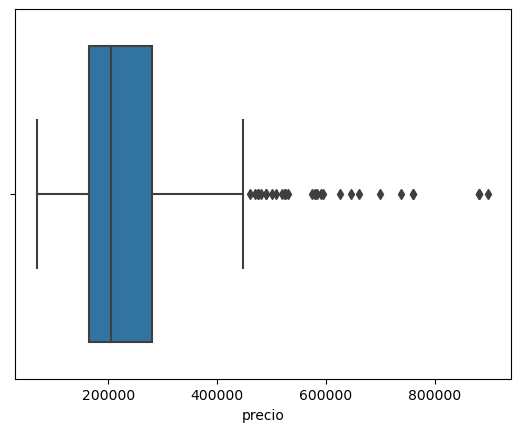

In [26]:
sns.boxplot(x=df1['precio'])
plt.show()

In [27]:
#df1 = df1[df1['precio']<2000000]

In [28]:
df1.shape

(562, 14)

In [29]:
df1.sort_values(by='precio')

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
5865,0,central,latina,70000,40,2,1,1,1,1750.00,2854.89,1181.09,españa,madrid
5866,0,central,latina,76000,51,2,1,0,0,1490.20,2854.89,1181.09,españa,madrid
5867,0,central,latina,78700,43,3,1,3,0,1830.23,2854.89,1181.09,españa,madrid
5868,0,central,latina,82000,60,3,4,3,0,1366.67,2854.89,1181.09,españa,madrid
5869,0,central,latina,82600,43,2,3,3,1,1920.93,2854.89,1181.09,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,0,central,latina,760000,192,6,4,1,1,3958.33,2854.89,1181.09,españa,madrid
6424,0,central,latina,880000,160,5,9,1,1,5500.00,2854.89,1181.09,españa,madrid
6425,2,central,latina,880000,170,5,9,1,1,5176.47,2854.89,1181.09,españa,madrid
6423,0,central,latina,880000,164,5,9,1,1,5365.85,2854.89,1181.09,españa,madrid


In [30]:
df1

,descripcion,zona,distrito,precio,superficie,habitaciones,plantas,caract,ascensor,€/m2,distrito_€/m2,media_alq,pais,ciudad
5865,0,central,latina,70000,40,2,1,1,1,1750.00,2854.89,1181.09,españa,madrid
5866,0,central,latina,76000,51,2,1,0,0,1490.20,2854.89,1181.09,españa,madrid
5867,0,central,latina,78700,43,3,1,3,0,1830.23,2854.89,1181.09,españa,madrid
5868,0,central,latina,82000,60,3,4,3,0,1366.67,2854.89,1181.09,españa,madrid
5869,0,central,latina,82600,43,2,3,3,1,1920.93,2854.89,1181.09,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6422,1,central,latina,760000,536,4,-4,2,2,1417.91,2854.89,1181.09,españa,madrid
6423,0,central,latina,880000,164,5,9,1,1,5365.85,2854.89,1181.09,españa,madrid
6424,0,central,latina,880000,160,5,9,1,1,5500.00,2854.89,1181.09,españa,madrid
6425,2,central,latina,880000,170,5,9,1,1,5176.47,2854.89,1181.09,españa,madrid


In [31]:
df1.precio.describe()

count      562.00
mean    241710.39
std     123466.63
min      70000.00
25%     165000.00
50%     205500.00
75%     280000.00
max     898000.00
Name: precio, dtype: float64

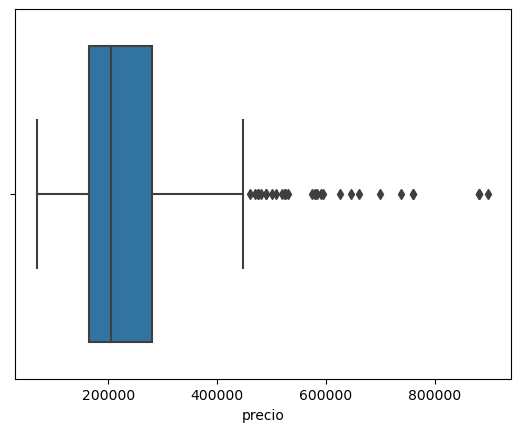

In [32]:
sns.boxplot(x=df1['precio'])
plt.show()

In [33]:
"""def remove_outliers(data, threshold=1.5):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr
    return data[~((data < lower_bound) | (data > upper_bound))].dropna()
df1['precio'] = remove_outliers(df1['precio'])
df1 = df1.dropna()"""

"def remove_outliers(data, threshold=1.5):\n    q1 = data.quantile(0.25)\n    q3 = data.quantile(0.75)\n    iqr = q3 - q1\n    lower_bound = q1 - threshold * iqr\n    upper_bound = q3 + threshold * iqr\n    return data[~((data < lower_bound) | (data > upper_bound))].dropna()\ndf1['precio'] = remove_outliers(df1['precio'])\ndf1 = df1.dropna()"

In [34]:
df1.shape

(562, 14)

In [35]:
df1 = df1.drop(columns=['distrito_€/m2','€/m2','zona','distrito','media_alq','pais','ciudad'])

In [36]:
X = df1.drop('precio', axis=1)

y = df1.precio

In [37]:
#X = X.drop(columns=['zona','distrito','media_alq'])

In [38]:
from sklearn.preprocessing import StandardScaler

In [39]:
"""scaler = StandardScaler()

X[['descripcion', 'superficie', 'habitaciones',
   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',
                                                               'plantas', 'caract', 'ascensor']])"""

"scaler = StandardScaler()\n\nX[['descripcion', 'superficie', 'habitaciones',\n   'plantas', 'caract', 'ascensor']] = scaler.fit_transform(X[['descripcion', 'superficie', 'habitaciones',\n                                                               'plantas', 'caract', 'ascensor']])"

In [40]:
X_train, X_test, y_train, y_test = tts(X, y,
                                      train_size=0.8,
                                      test_size=0.2,
                                      random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((449, 6), (113, 6), (449,), (113,))

In [41]:
"""plt.figure(figsize=(15, 10))

sns.set(style='white')

mask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))

cmap=sns.diverging_palette(0, 10, as_cmap=True)


sns.heatmap(X.corr(method='spearman'),
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});"""

"plt.figure(figsize=(15, 10))\n\nsns.set(style='white')\n\nmask=np.triu(np.ones_like(X.corr(method='spearman'), dtype=bool))\n\ncmap=sns.diverging_palette(0, 10, as_cmap=True)\n\n\nsns.heatmap(X.corr(method='spearman'),\n           mask=mask,\n          cmap=cmap,\n          center=0,\n          square=True,\n          annot=True,\n          linewidths=0.5,\n          cbar_kws={'shrink': 0.5});"

In [42]:
"""xgbr=XGBR(random_state=42)

xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse(y_test, y_pred, squared=False)"""

'xgbr=XGBR(random_state=42)\n\nxgbr.fit(X_train, y_train)\n\ny_pred = xgbr.predict(X_test)\n\nmse(y_test, y_pred, squared=False)'

In [43]:
#print(f"Test accuracy: {xgbr.score(X_test, y_test):0.4f}")

In [44]:
#mse(y_test, y_pred, squared=False)*100/df1.precio.mean()

In [45]:
#dict(zip(X.columns, xgbr.feature_importances_*100))

In [46]:
X1 = df1.drop(columns='precio')
y1 = df1.precio

In [47]:
xgbr=XGBR(random_state=42)
xgbr.fit(X1, y1)
y1_pred = xgbr.predict(X1)
mse(y1_pred, y1, squared=False)

17566.14131238023

In [48]:
dict(zip(X.columns, xgbr.feature_importances_*100))

{'descripcion': 13.559252,
 'superficie': 36.586254,
 'habitaciones': 14.743444,
 'plantas': 8.3495,
 'caract': 9.97349,
 'ascensor': 16.78806}

In [49]:
df1.precio.mean()

241710.39323843416

In [50]:
print(f"Test accuracy: {xgbr.score(X1, y1):0.4f}")

Test accuracy: 0.9797


In [51]:
mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

7.267433177791485

In [52]:
"""rfr=RFR(random_state=42)
rfr.fit(X1, y1)
y1_pred = rfr.predict(X1)
mse(y1_pred, y1, squared=False)"""

'rfr=RFR(random_state=42)\nrfr.fit(X1, y1)\ny1_pred = rfr.predict(X1)\nmse(y1_pred, y1, squared=False)'

In [53]:
#dict(zip(X.columns, rfr.feature_importances_*100))

In [54]:
#print(f"Test accuracy: {rfr.score(X1, y1):0.4f}")

In [55]:
#mse(y1_pred, y1, squared=False)*100/df1.precio.mean()

In [56]:
y1 = pd.DataFrame(y1)

In [57]:
y1

,precio
5865,70000
5866,76000
5867,78700
5868,82000
5869,82600
...,...
6422,760000
6423,880000
6424,880000
6425,880000


In [58]:
y1_pred

array([ 82483.375,  79659.32 ,  76159.38 ,  88130.78 ,  85567.94 ,
       100114.734, 128871.37 , 128100.71 ,  98122.805, 186400.1  ,
       111144.05 , 103877.33 , 100210.3  , 142895.02 , 109090.34 ,
       114608.6  , 112655.164, 123387.58 , 119490.22 , 111082.2  ,
       122481.98 , 116811.38 , 116204.65 , 119527.76 , 122370.5  ,
       139293.78 , 139496.31 , 128602.16 , 122401.91 , 115454.43 ,
       122140.375, 119527.76 , 145491.14 , 130057.055, 132220.61 ,
       126539.055, 132220.61 , 125758.05 , 162960.84 , 127402.45 ,
       120073.664, 145163.88 , 122497.086, 135768.44 , 131184.25 ,
       126616.53 , 128391.93 , 128093.04 , 129823.3  , 133487.23 ,
       133301.19 , 129941.234, 155131.61 , 127680.15 , 130417.58 ,
       138258.05 , 130820.83 , 125218.24 , 146313.27 , 136048.67 ,
       137667.47 , 171733.06 , 136684.69 , 138743.86 , 153498.31 ,
       138093.58 , 137932.61 , 177355.77 , 139947.72 , 139946.2  ,
       184429.39 , 143240.17 , 155529.28 , 163587.06 , 146538.

In [59]:
y1_pred = pd.DataFrame(y1_pred, columns=['prediccion'])

In [60]:
y1 = y1.reset_index(drop=True)
y1_pred = y1_pred.reset_index(drop=True)

In [61]:
con = pd.concat([y1,y1_pred], axis=1)

In [62]:
con

,precio,prediccion
0,70000,82483.38
1,76000,79659.32
2,78700,76159.38
3,82000,88130.78
4,82600,85567.94
...,...,...
557,760000,759572.19
558,880000,880259.06
559,880000,878177.81
560,880000,880309.88


In [63]:
con['dif'] = abs(con['precio'] - con['prediccion'])

con['porcen'] = con['dif']*100/ con['precio']

con['porcen'].mean()

5.045897553866445

In [64]:
con.head(100)

,precio,prediccion,dif,porcen
0,70000,82483.38,12483.38,17.83
1,76000,79659.32,3659.32,4.81
2,78700,76159.38,2540.62,3.23
3,82000,88130.78,6130.78,7.48
4,82600,85567.94,2967.94,3.59
5,91000,100114.73,9114.73,10.02
6,93100,128871.37,35771.37,38.42
7,95000,128100.71,33100.71,34.84
8,97200,98122.80,922.80,0.95
9,99000,186400.09,87400.09,88.28


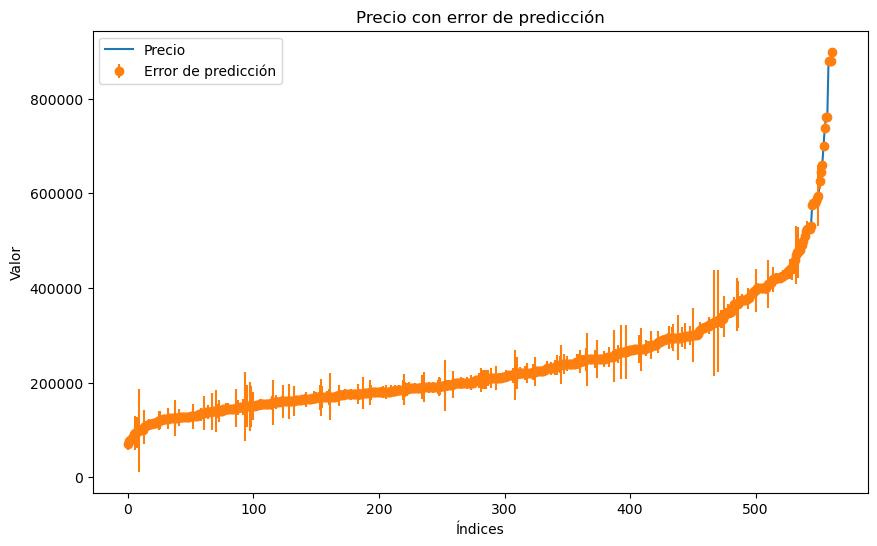

In [65]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico
plt.plot(con.index, con['precio'], label='Precio')  # Línea del precio

# Dibujar el error absoluto alrededor de la línea del precio
plt.errorbar(con.index, con['precio'], yerr=con['dif'], fmt='o', label='Error de predicción')

plt.xlabel('Índices')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Precio con error de predicción')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()

In [66]:
con2 = con[(con['precio']>100000) & (con['precio']<200000)]

In [67]:
con2

,precio,prediccion,dif,porcen
13,107000,142895.02,35895.02,33.55
14,108300,109090.34,790.34,0.73
15,110000,114608.60,4608.60,4.19
16,110000,112655.16,2655.16,2.41
17,112000,123387.58,11387.58,10.17
...,...,...,...,...
269,199000,197347.06,1652.94,0.83
270,199000,186694.34,12305.66,6.18
271,199000,199532.67,532.67,0.27
272,199524,197215.80,2308.20,1.16


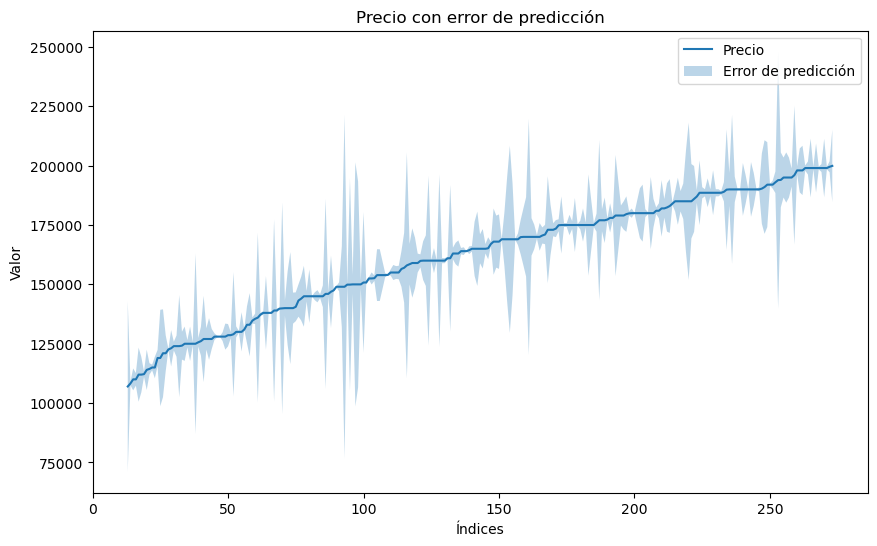

In [68]:
plt.figure(figsize=(10, 6))  # Establecer el tamaño del gráfico

# Dibujar la línea de precio
plt.plot(con2.index, con2['precio'], label='Precio')

# Dibujar el error como una línea que une los errores por arriba como por abajo
plt.fill_between(con2.index, con2['precio'] + con2['dif'], con2['precio'] - con2['dif'], alpha=0.3, label='Error de predicción')

plt.xlabel('Índices')  # Etiqueta del eje x
plt.ylabel('Valor')  # Etiqueta del eje y
plt.title('Precio con error de predicción')  # Título del gráfico
plt.legend()  # Mostrar leyenda
plt.show()

In [69]:
alquiler

,descripcion,zona,Distrito,precio,superficie,habitaciones,plantas,caract,ascensor,garaje,€/m2,distrito_€/m2,media_alq,pais,ciudad
0,4,central,Arganzuela,600.00,25,0,3,3,3,0,24.00,21.04,1530.95,españa,madrid
1,0,central,Arganzuela,700.00,35,2,0,1,0,0,20.00,21.04,1530.95,españa,madrid
2,0,central,Arganzuela,790.00,40,1,1,0,1,0,19.75,21.04,1530.95,españa,madrid
3,4,central,Arganzuela,800.00,40,0,3,3,3,0,20.00,21.04,1530.95,españa,madrid
4,0,central,Arganzuela,800.00,35,1,4,0,1,0,22.86,21.04,1530.95,españa,madrid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8177,0,central,Villaverde,1465.00,45,1,6,1,1,0,32.56,15.34,1022.74,españa,madrid
8178,3,central,Villaverde,1475.00,64,2,5,1,1,0,23.05,15.34,1022.74,españa,madrid
8179,0,central,Villaverde,1500.00,90,4,6,1,1,0,16.67,15.34,1022.74,españa,madrid
8180,0,central,Villaverde,1895.00,80,2,0,1,1,0,23.69,15.34,1022.74,españa,madrid


In [70]:
con.to_excel('latina_tasacion_compra.xlsx', index=False)